
 # Contents
#### 1. Introduction
#### 2. Package Install
#### 3. Data Cleaning
#### 4. Data Summary
#### 5. Word Cloud
#### 6. Sentiment Analysis
#### 7. Topic Modeling
#### 8. Correlation Heat Map
#### 9. Conclusion

# 1. Introduction

German Idealism, which emerged in the late 18th and early 19th centuries, is considered a significant intellectual and cultural movement that shaped modern philosophy and influenced various fields such as art, politics, religion, and social sciences. It is characterized by its focus on the subjective experience, the search for universal truth and the ideal, and the critique of Enlightenment reason. Today, German Idealism continues to be studied and debated due to its impact on subsequent philosophical movements and its contributions to our understanding of human nature, freedom, and the role of the state. Key figures of German Idealism include Immanuel Kant, J.G. Fichte,and Georg Wilhelm Friedrich Hegel. 

However, not all of them share the similar review in philosophy thinking. There is a famous book named "Hegel's critique of Kant" , arguing thet Hegel offers a compelling critique of and alternative to the conception of cognition that Kant defended in his 'Critical' period. It's very seldom that philosophers in same school would compelling each other, therefore this dataset story would aim to develop the difference and similarity of literary works of Kant, Fichte and Hegel， and the general development of german idealism from 1781 to 1820.

### Research Questions:
1. What's the general words normally used in german idealism ?
2. What's the difference in word choosing of Kant and Hegel?
3. Will Kant and Hegel have huge difference in sentiment of the literary works?
4. Will Kant and Hegal have huge difference in topic choosing?


# 2. Pacakage Install

In [1]:
# install necessary packages
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
import seaborn as sns

# packages for word cloud
from wordcloud import WordCloud, STOPWORDS

#pacakges for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentimentAnalyser = SentimentIntensityAnalyzer()

#packages for emotion analysis
#pip install EmoTFIDF
import text2emotion as te
import ast
from emotfidf import EmoTFIDF
emTFIDF  = EmoTFIDF()

#pacakges for LDA topic modeling
# pip install gensim
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords 

#pacakages for visuali of LDA model
#pip install pyldavis
import pyLDAvis.gensim_models

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ALIENWARE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ALIENWARE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ALIENWARE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ALIENWARE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ALIENWARE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ALIENWARE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 3. Data Cleaning


The presence of missing values can lead to bias in the results, reduce the sample size for analysis, and cause difficulties in comparing and combining datasets. Additionally, imputing missing values can also be challenging and may not always produce accurate results. Therefore, identifying and either imputing or removing missing values is a crucial step in the pre-processing of any dataset before analysis or modeling.

From the result below, we can conclude there is no missing value in the dataset.

The size of the dataset is 360808 x 11, it has 360808 values and 11 variables. 


In [3]:
##data cleaning

##data reading
df=pd.read_csv("C:/Users/ALIENWARE/Desktop/5243applied DS/philosophy_data.csv")
df
##check missing values
df.info()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."
...,...,...,...,...,...,...,...,...,...,...,...
360803,"Women, Race, And Class",Davis,feminism,But the socialization of housework including m...,But the socialization of housework including m...,1981,1981,142,but the socialization of housework including m...,"['but', 'the', 'socialization', 'of', 'housewo...",but the socialization of housework include me...
360804,"Women, Race, And Class",Davis,feminism,The only significant steps toward endingdomest...,The only significant steps toward endingdomest...,1981,1981,117,the only significant steps toward endingdomest...,"['the', 'only', 'significant', 'steps', 'towar...",the only significant step toward endingdomest...
360805,"Women, Race, And Class",Davis,feminism,"Working women, therefore, have a special and v...","Working women, therefore, have a special and v...",1981,1981,90,"working women, therefore, have a special and v...","['working', 'women', 'therefore', 'have', 'spe...","working woman , therefore , have a special an..."
360806,"Women, Race, And Class",Davis,feminism,"Moreover, under capitalism, campaigns for jobs...","Moreover, under capitalism, campaigns for jobs...",1981,1981,199,"moreover, under capitalism, campaigns for jobs...","['moreover', 'under', 'capitalism', 'campaigns...","moreover , under capitalism , campaign for jo..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB


# 4.Data summary

There are 13 philosophy schools in the dataset.The research school "german_idealism" has 42136 values in the dataset, 
with three authors,"Kant", "Fichte",and "Hegel". 

The sample size of Fitche's literary work in the dataset is 5308, and the sample size of kant's literary work is 14128, Hegel has the
largest sample size compared to Fitche and Kant, which is 22700.This shows that there is no balance in the sample size of authors in
german idealism.Same as the sentence length of each author in german idealism, the sentence length of Hegel is much more than Fitche,and there is no balance. 



analytic           55425
aristotle          48779
german_idealism    42136
plato              38366
continental        33779
phenomenology      28573
rationalism        22949
empiricism         19931
feminism           18635
capitalism         18194
communism          17958
nietzsche          13548
stoicism            2535
Name: school, dtype: int64


array(['Kant', 'Fichte', 'Hegel'], dtype=object)

author
Fichte     5308
Kant      14128
Hegel     22700
Name: author, dtype: int64

<AxesSubplot:title={'center':'sample size of each author in german_idealism'}, xlabel='author', ylabel='frequency'>

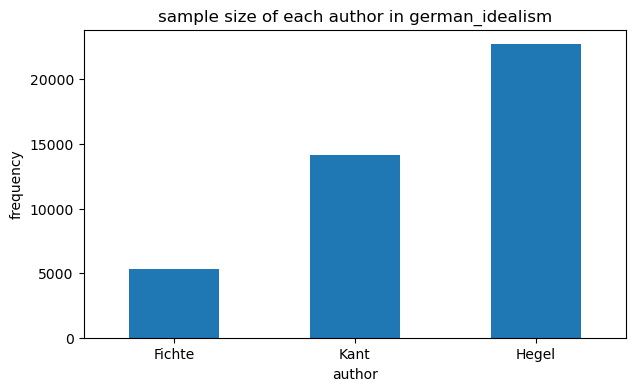

author
Fichte     806628
Kant      2799596
Hegel     3988846
Name: sentence_length, dtype: int64

<AxesSubplot:title={'center':'sentence length of each author in german_idealism'}, xlabel='author', ylabel='frequency'>

<Figure size 700x400 with 0 Axes>

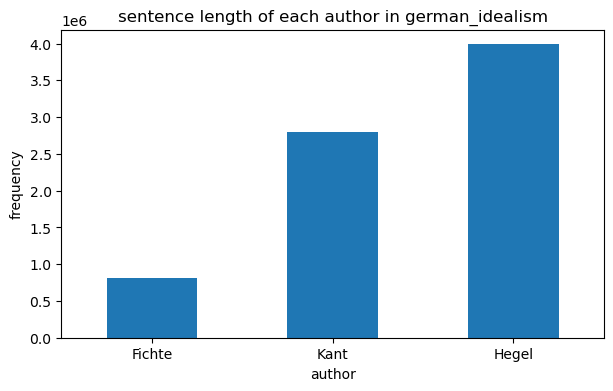

<Figure size 700x400 with 0 Axes>

In [4]:
##data summary
##total size of each category of school
plt.rcParams["figure.figsize"] = (7,4)
school_category_size= df.school.value_counts()
print(school_category_size)

##authors showed up in german_idealism
df.loc[(df["school"]=="german_idealism")].author.unique()

##balance of sample size of each author in german_idealism
data_size_author=df.loc[(df["author"]=="Hegel")|(df["author"]=="Kant")|(df["author"]=="Fichte")].groupby("author").author.count()
data_size_author[np.argsort(data_size_author)]
data_size_author[np.argsort(data_size_author)].plot.bar(rot=0,title="sample size of each author in german_idealism",ylabel="frequency")
plt.figure(1)

##balance of sentence length of each author in german_idealism
sentence_length_author = df.loc[(df["school"]=="german_idealism")].groupby("author").sentence_length.sum() 
sentence_length_author[np.argsort(sentence_length_author)]
sentence_length_author[np.argsort(sentence_length_author)].plot.bar(rot=0,title="sentence length of each author in german_idealism",ylabel="frequency")
plt.figure(2)

The dataset has the data of german idealism from 1781 to 1820. The original publication date of Kant is earliest from 1788 to 1781, and Hegel has the latest original publication date, which is from 1871 to 1820. 

The dataset only has literary works of Fitche, which are originally published in 1798. 

author
Fichte                [1798]
Hegel     [1817, 1807, 1820]
Kant      [1788, 1790, 1781]
Name: original_publication_date, dtype: object

,author,original_publication_date
247802,Kant,1788
247803,Kant,1788
247804,Kant,1788
247805,Kant,1788
247806,Kant,1788
...,...,...
289933,Hegel,1820
289934,Hegel,1820
289935,Hegel,1820
289936,Hegel,1820


[Text(0.5, 1.0, "count plot of authors' literary work from 1781 to 1820")]

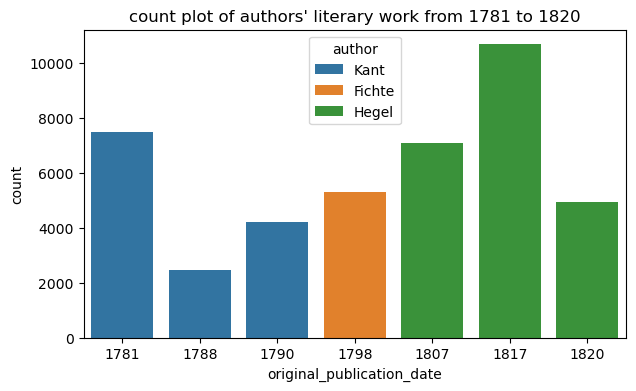

In [9]:
##original publication date
df.loc[(df["school"]=="german_idealism")].groupby("author").original_publication_date.unique()

df_publicationdate_author=pd.DataFrame(df,columns=["author","original_publication_date"])\
[(df.author =="Kant")|(df.author =="Fichte")|(df.author =="Hegel")]

df_publicationdate_author
sns.countplot(x="original_publication_date",hue="author",data=df_publicationdate_author, dodge = False).set(title="count plot of authors' literary work from 1781 to 1820")

# 5.word cloud

Word Cloud provides a visual representation of the most frequently occurring words in a dataset, helping identify the most common themes and topics in a large corpus of text data.

Here, we use word cloud for text mining.

The first word cloud is for general words choosing of authors in german idealism as a whole set. "Concept", "Object", "Nature" are high frequency words used in german idealism, these high frequency words indicate that German Idealism was concerned with the nature of human consciousness and its relationship to the external world, including the process of abstraction, categorization, and the relationship between the subject and the object of perception.

The high frequency words of Kant are "Concept", "Object", "Reason","Nature", "Principle", and the high frequency words of Hegel are "Determination","Content","Universal","Concept","Consciousness", it seems that there is difference between the topic and word choosing of Kant and Hegel.Kant focusing more on the nature of human understanding, while Hegel's philosophy was more concerned with the nature of reality and the development of consciousness.


<Figure size 504x288 with 0 Axes>

(-0.5, 499.5, 499.5, -0.5)

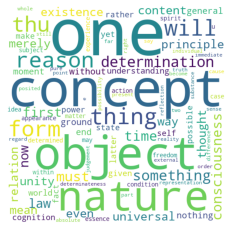

Author =  KANT :


<Figure size 504x288 with 0 Axes>

(-0.5, 499.5, 499.5, -0.5)

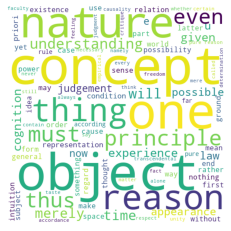

Author =  FICHTE :


<Figure size 504x288 with 0 Axes>

(-0.5, 499.5, 499.5, -0.5)

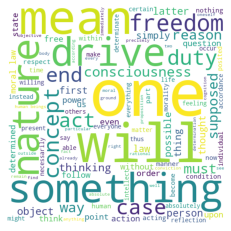

Author =  HEGEL :


<Figure size 504x288 with 0 Axes>

(-0.5, 499.5, 499.5, -0.5)

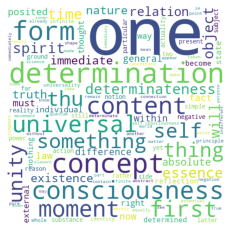

In [11]:
##word cloud

##general word cloud for german_idealism
stop = set(STOPWORDS)
df_german = df[df["school"] == "german_idealism"]
text = " ".join(txt for txt in df_german.sentence_lowered)
wordcloud = WordCloud(stopwords = stop,
                      max_font_size = 150,
                      min_font_size = 10,
                      max_words = 250,
                      width = 500,
                      height = 500,
                      background_color = "white").generate(text)
plt.figure(figsize=(7,4))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##for each author in german_idealism
author = ["Kant","Fichte","Hegel"]
stop = set(STOPWORDS)
for author in author:
    df_author_german = df[df.author == author]
    print("Author = ", author.upper(), ":")
    text = " ".join(txt for txt in df_author_german.sentence_lowered)
    wordcloud = WordCloud(stopwords = stop,
                         max_font_size = 150,
                         min_font_size = 10,
                         max_words = 250,
                         width = 500,
                         height = 500,
                         background_color = "white").generate(text)
    plt.figure(figsize=(7,4))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# 6.sentiment analysis

The positive score indicate positive sentiment and negative score indicate negative sentiment. The magnitude of the polarity score indicates the strength of the sentiment.A score of +1.0 would indicate very strong positive sentiment, while a score of -0.5 would indicate relatively weak negative sentiment.

From the histgram plot of sentiment scores of three authors in german idealism, we can conclude that all three authors ahve similar sentiment score, and most of their literary works are neutrual or positive sentiment. 

In [12]:
##sentiment analysis
def sentiment(text):
    total_sentiment= sentimentAnalyser.polarity_scores(text)
    total_score = total_sentiment['compound']
    return total_score

# Apply the function to every row in the "tokenized_txt" column and output the results into a new column "sentiment_score"
df['sentiment_score'] = df['tokenized_txt'].apply(sentiment)

<Figure size 648x432 with 0 Axes>

(array([0.02915515, 0.04883488, 0.08017668, 0.1275538 , 0.16253999,
        0.20554384, 0.29228043, 0.2864494 , 0.19388178, 3.97093208,
        0.31852007, 0.32216446, 0.42639414, 0.71503017, 0.55905009,
        0.54447252, 0.57216991, 0.49782427, 0.54082812, 0.40379889]),
 array([-0.9491 , -0.85199, -0.75488, -0.65777, -0.56066, -0.46355,
        -0.36644, -0.26933, -0.17222, -0.07511,  0.022  ,  0.11911,
         0.21622,  0.31333,  0.41044,  0.50755,  0.60466,  0.70177,
         0.79888,  0.89599,  0.9931 ]),
 [<matplotlib.patches.Polygon at 0x2a33f04c0>])

(array([0.06387251, 0.08516335, 0.10451866, 0.13355161, 0.17226223,
        0.22645709, 0.2651677 , 0.20323072, 0.16645564, 3.70267013,
        0.28065194, 0.34258892, 0.43742993, 0.76840567, 0.69872656,
        0.51291562, 0.6948555 , 0.58840132, 0.52839987, 0.29807172]),
 array([-0.9593  , -0.861965, -0.76463 , -0.667295, -0.56996 , -0.472625,
        -0.37529 , -0.277955, -0.18062 , -0.083285,  0.01405 ,  0.111385,
         0.20872 ,  0.306055,  0.40339 ,  0.500725,  0.59806 ,  0.695395,
         0.79273 ,  0.890065,  0.9874  ]),
 [<matplotlib.patches.Polygon at 0x2a33f0940>])

(array([0.043371  , 0.10060283, 0.14084397, 0.15202206, 0.27498108,
        0.22222048, 0.30717399, 0.28258218, 0.18376784, 3.64405823,
        0.25575476, 0.36574719, 0.71808068, 0.55040929, 0.7694999 ,
        0.58662631, 0.51195665, 0.46947989, 0.38452639, 0.18600346]),
 array([-0.9811  , -0.882575, -0.78405 , -0.685525, -0.587   , -0.488475,
        -0.38995 , -0.291425, -0.1929  , -0.094375,  0.00415 ,  0.102675,
         0.2012  ,  0.299725,  0.39825 ,  0.496775,  0.5953  ,  0.693825,
         0.79235 ,  0.890875,  0.9894  ]),
 [<matplotlib.patches.Polygon at 0x2a33f0460>])

Text(0.5, 0, 'sentiment score')

Text(0, 0.5, 'frequency')

Text(0.5, 1.0, 'distribution of sentiment score of 3 authors')

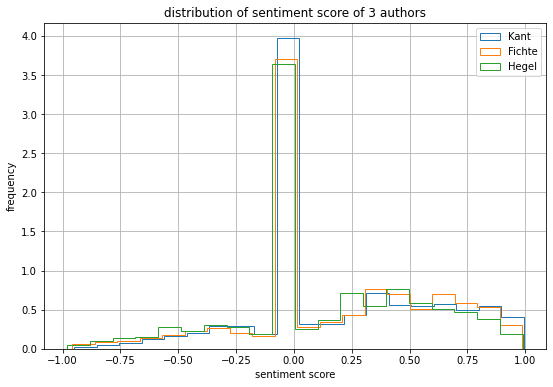

In [99]:
plt.figure(figsize = (9, 6))
plt.grid()
#plot the hist plot of the sentiment scores of each author
for author in authors:
    plt.hist(df[df.author == author].sentiment_score, density = True, histtype = 'step', bins = 20)
plt.legend(authors)
plt.xlabel('sentiment score')
plt.ylabel('frequency')
plt.title('distribution of sentiment score of 3 authors')

## 6.1 emotion analysis

However, we should notice that sentiment analysis of philosophical works can be challenging as they often contain complex and abstract ideas, language, and arguments that can be difficult for an algorithm to interpret. There is a possibility that O sentiment score reflect the limitations of the sentiment analysis in accurately capturing the complexity of these works.

Furthermore,we do the emotion analysis, and from the following plots we find that most of their works have trust and positive emotions.

In [17]:

# get the emotion score of each text
def getEmotionsTFIDF(s,emTFIDF):
  emTFIDF.set_text(s)
  emTFIDF.get_emotfidf()
  return emTFIDF.em_tfidf

# create the TFIDF model of the corpus
emTFIDF.computeTFIDF(df['tokenized_txt'].apply(lambda x: ' '.join(ast.literal_eval(x))))

emotion_dict = {}
authors = ["Kant","Fichte","Hegel"]
#for loop each author, compute the emotion score of each author
for author in authors:
    #get the rows of this author
    df_author = df[df.author == author].copy()
    # calculate the emotion scores of each text of the author
    df_author['emotions'] = df_author.apply(lambda x: getEmotionsTFIDF(' '.join(ast.literal_eval(x['tokenized_txt'])),  emTFIDF), axis=1)#em_tfidf
    #save the emotion scores to a dict
    emotion_dict[author] = df_author['emotions'].apply(pd.Series)
    


D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'total emotion scores of 3 authors'}, xlabel='author', ylabel='emotion score'>

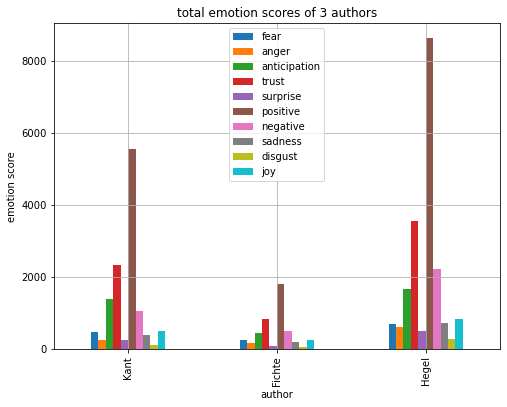

In [100]:
#compute the sum of the emotion scores of each  author（在最终不采用sum，用average更好）
df_emotion = pd.DataFrame([emotion_dict['Kant'].sum(axis = 0), emotion_dict['Fichte'].sum(axis = 0), 
              emotion_dict['Hegel'].sum(axis = 0)])
df_emotion.index = authors
#display the bar plot of the sum of the emotion scores
df_emotion.plot(kind = 'bar', figsize = (8,6), title = 'total emotion scores of 3 authors',  
                xlabel = 'author', ylabel = 'emotion score')
plt.grid()
plt.show()

<AxesSubplot:title={'center':'Average emotion scores of 3 authors'}, xlabel='author', ylabel='emotion score'>

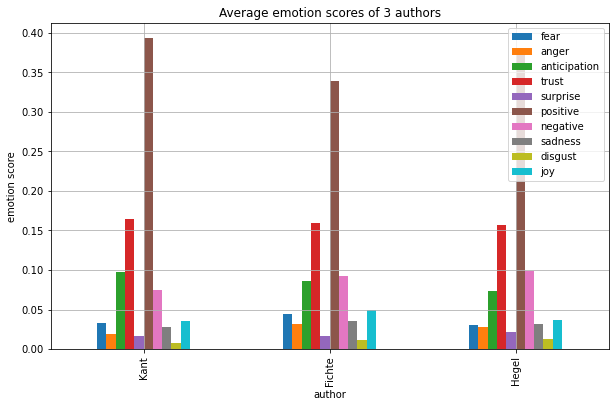

In [101]:
#compute the average of the emotion scores of each  author（
df_emotion = pd.DataFrame([emotion_dict['Kant'].mean(axis = 0), emotion_dict['Fichte'].mean(axis = 0), 
              emotion_dict['Hegel'].mean(axis = 0)])
df_emotion.index = authors
#display the bar plot of the average of the emotion scores
df_emotion.plot(kind = 'bar', figsize = (10,6), title = 'Average emotion scores of 3 authors',  
                xlabel = 'author', ylabel = 'emotion score')
plt.grid()
plt.show()

# 7.topic model

## 7.1 LDA topic modeling for total german_idealism 

Here,we use LDA to identify the main topics that are discussed in the total german idealism literary works. According to the coherence plot, since we have three authors in german idealism，the best topic size is three (having the highest coherence).

The top 10 words of the three topics are (the proportion is front of the word):

1) 0.016*"spirit" + 0.014*"state" + 0.010*"right" + 0.009*"consciousness" + 0.008*"world" + 0.007*"particular" + 0.007*"individual" + 0.007*"universal" + 0.006*"ie" + 0.006*"one"

The first topic have high relationship with "spirit" , "right", and "consciousness"

2) 0.013*"object" + 0.012*"reason" + 0.012*"would" + 0.012*"must" + 0.011*"one" + 0.011*"concept" + 0.009*"nature" + 0.006*"also" + 0.006*"subjective" + 0.006*"cognition"

The second topic have high relationship with "object" , "reason", and "concept"

3) 0.026*"self" + 0.013*"existence" + 0.012*"content" + 0.012*"consciousness" + 0.012*"one" + 0.011*"form" + 0.010*"absolute" + 0.009*"therefore" + 0.009*"unity" + 0.009*"determination"

The third topic have high relationship with "self"， "existence"，and "consciousness"

The topic words are similar to the word cloud of german idealism.

Using the pacakage "pyLDAvis.gensim_models"， a website document 'topic.html' is saved to visualize the LDA model.

#### The  visualization of top words of general 3 topics:
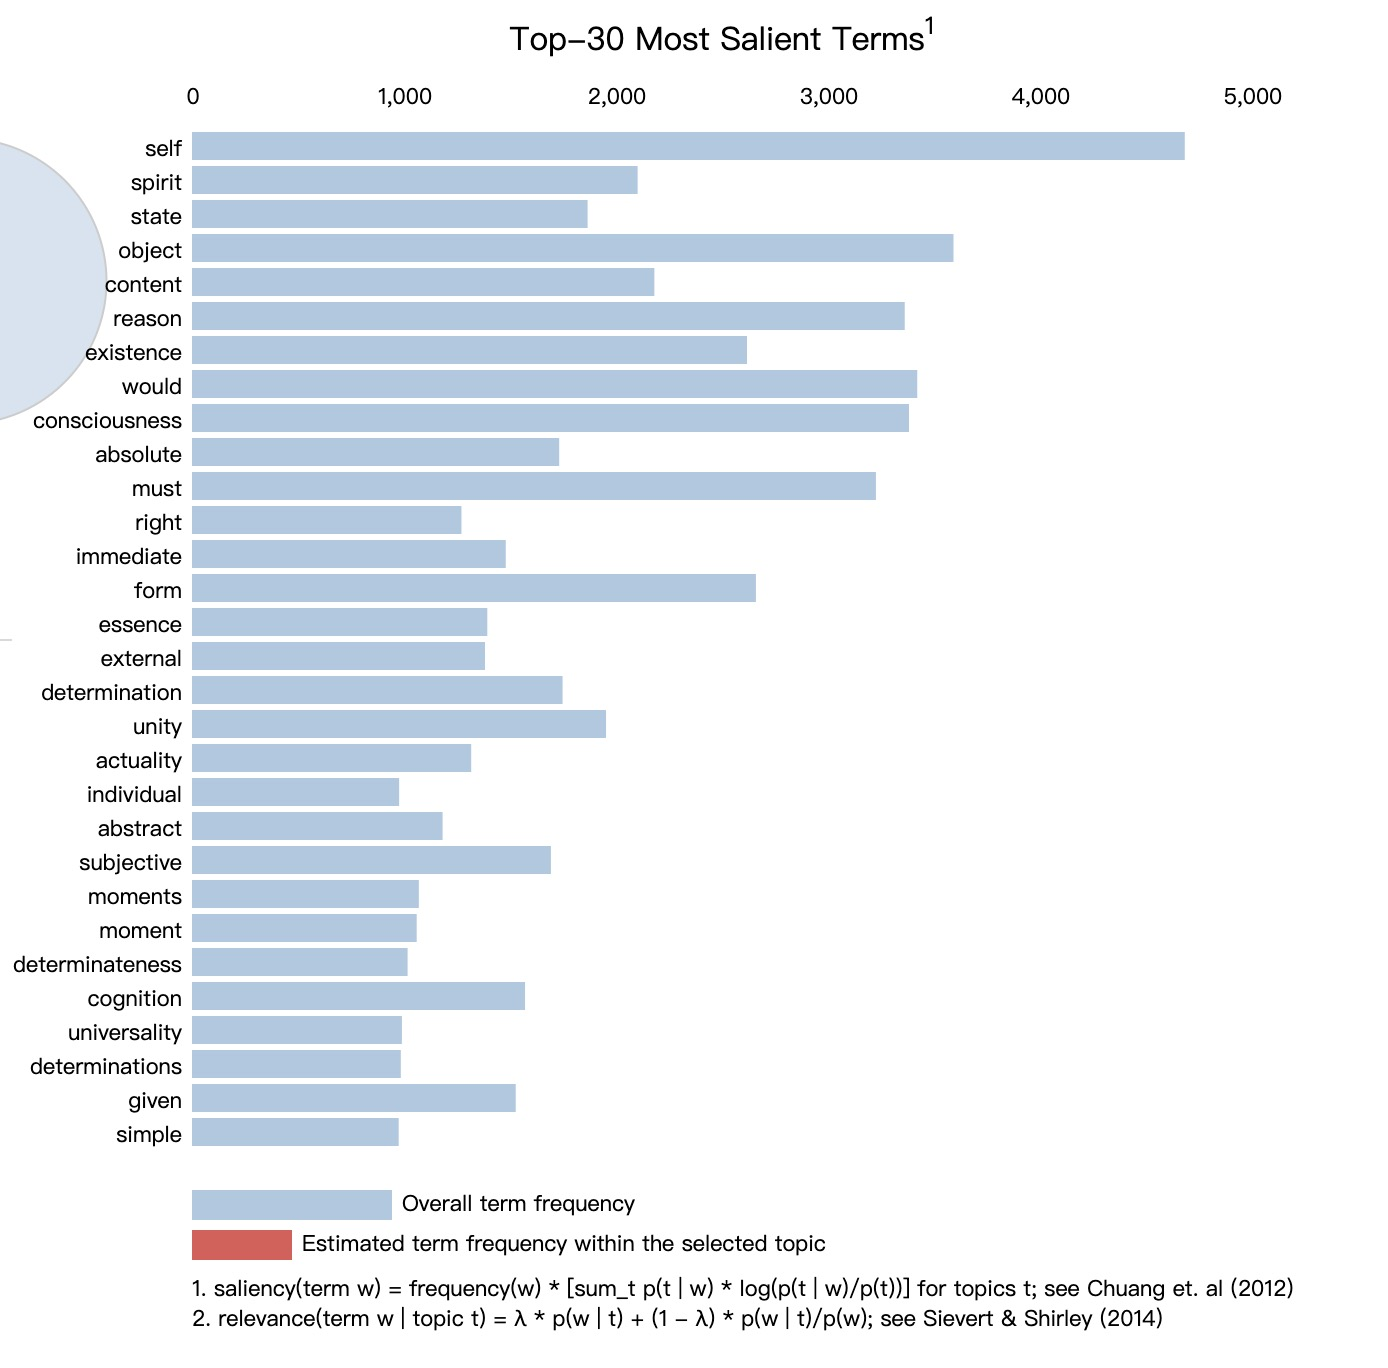


#### The  visualization of top words of the first topic:
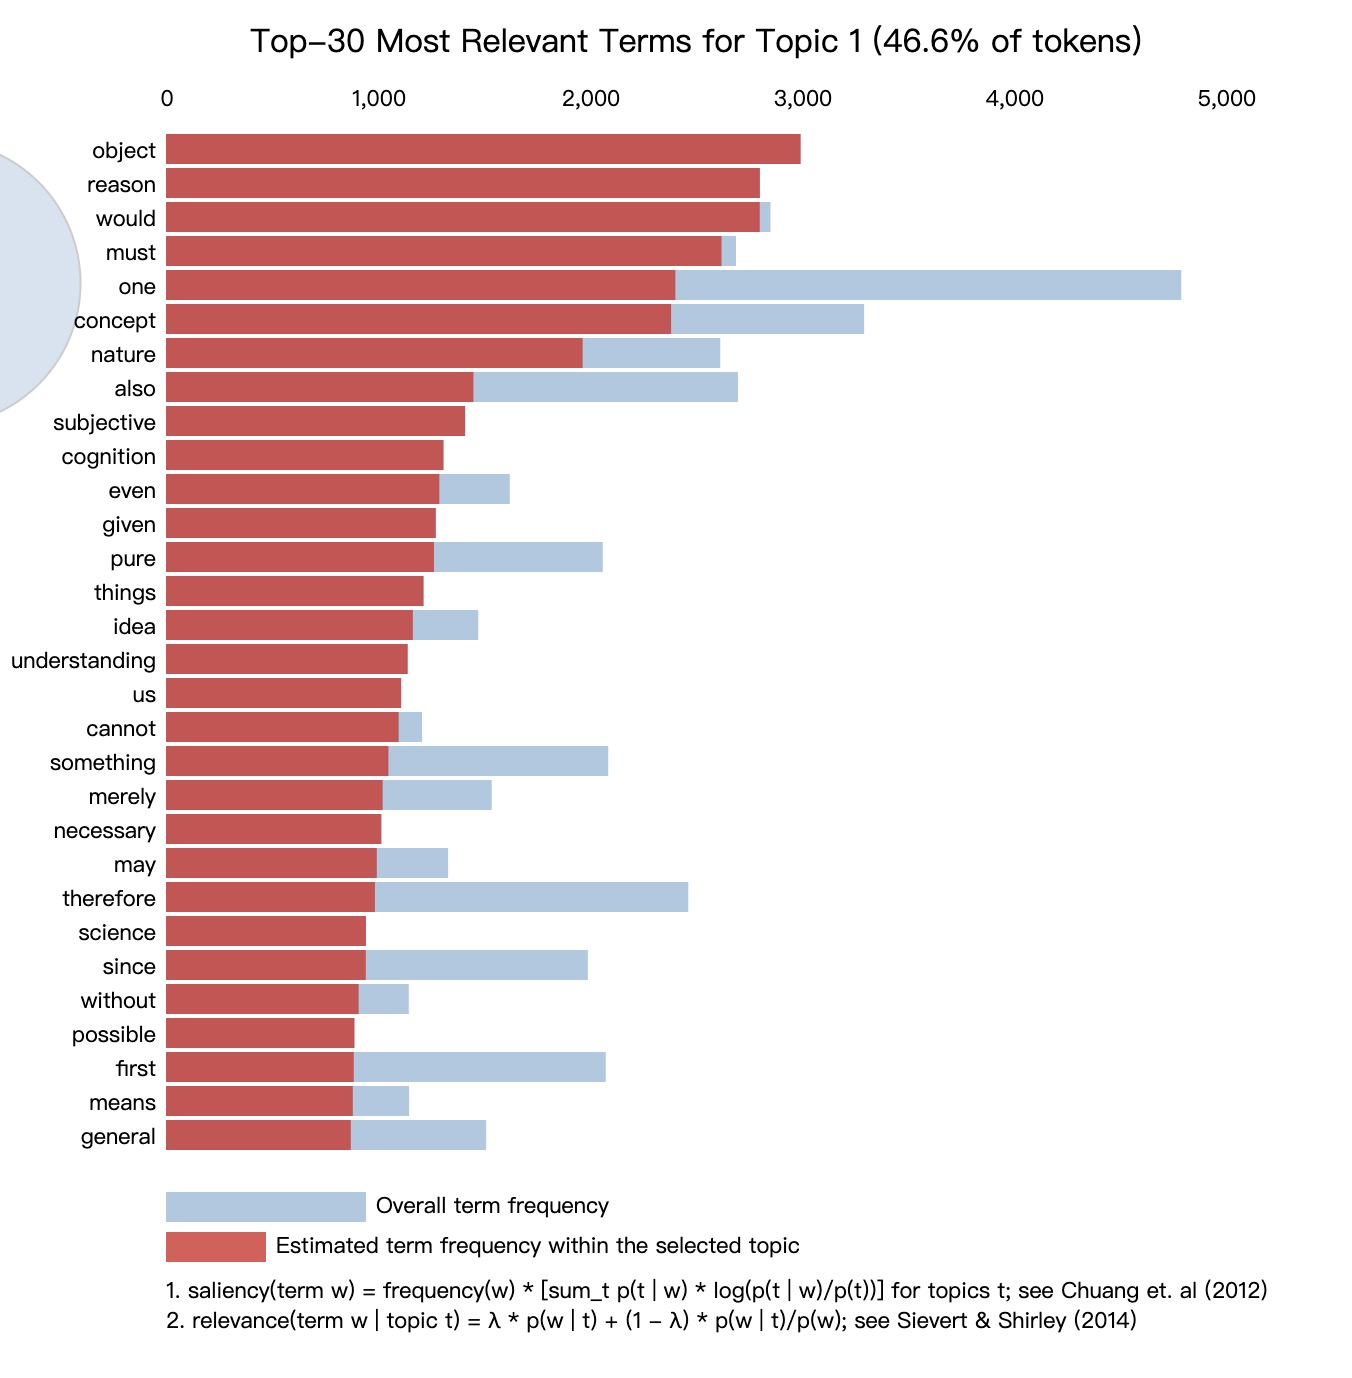

#### The  visualization of top words of the second topic:
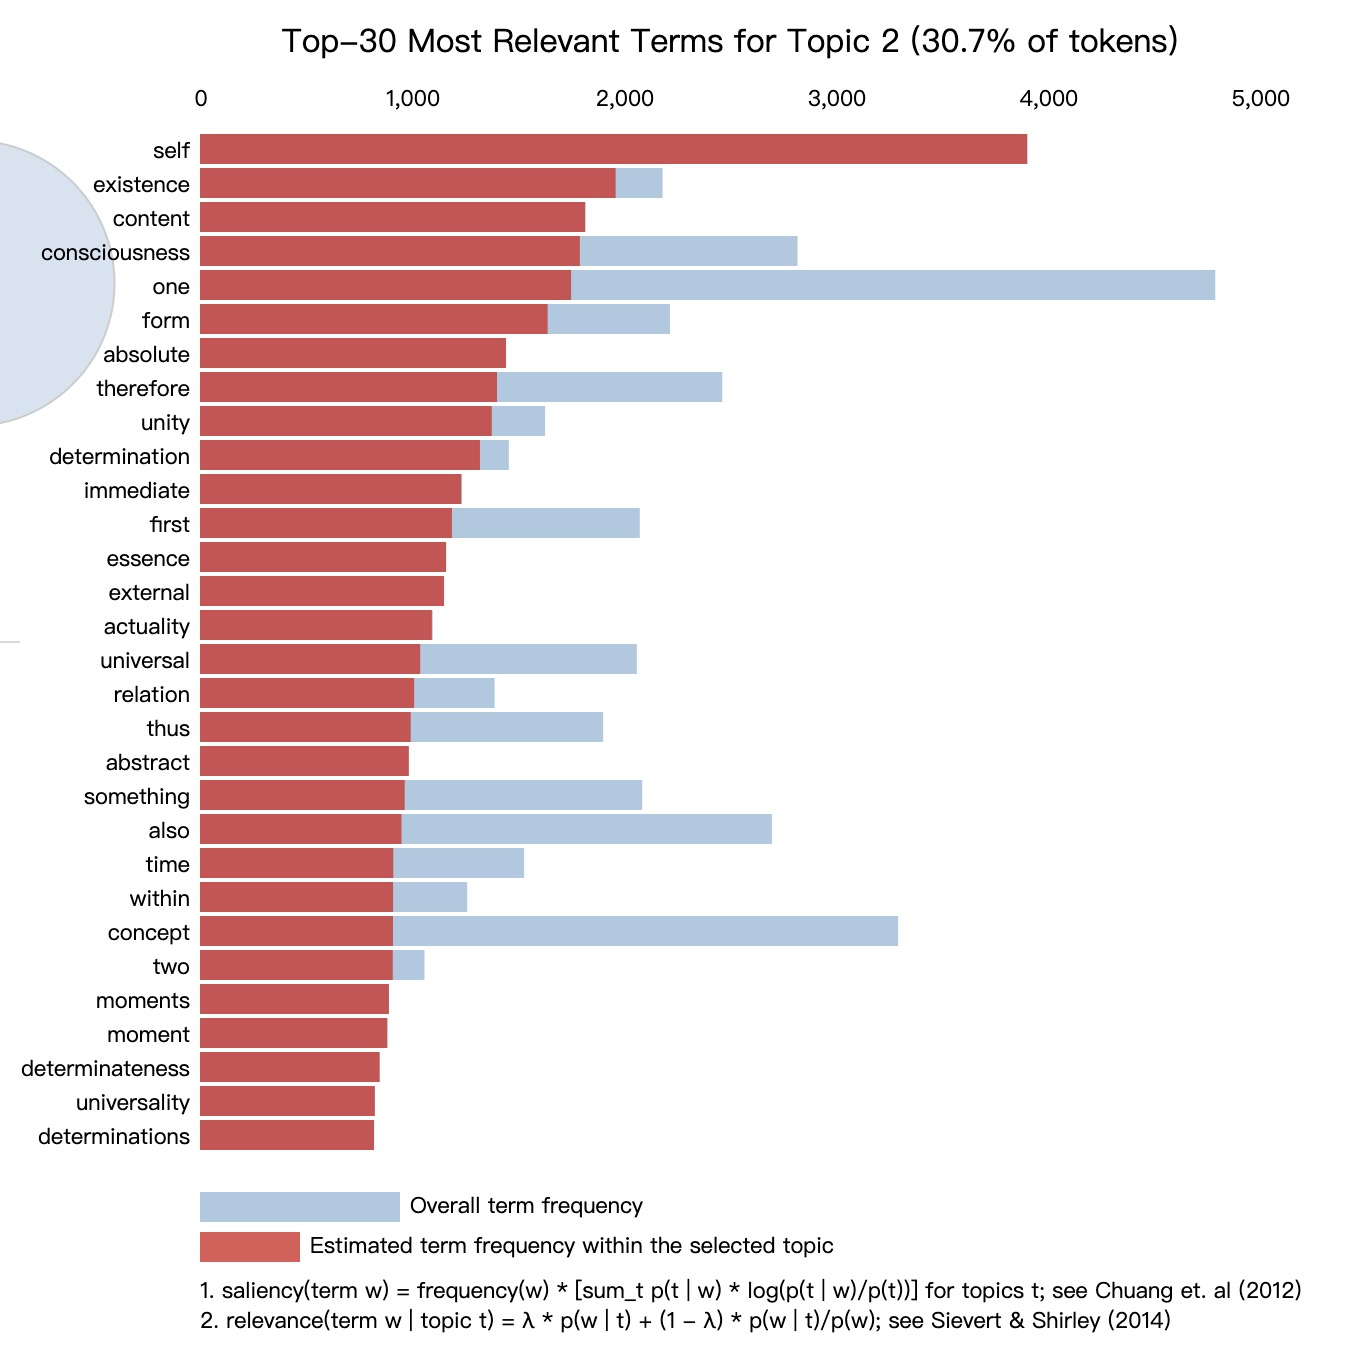

#### The  visualization of top words of the second topic:
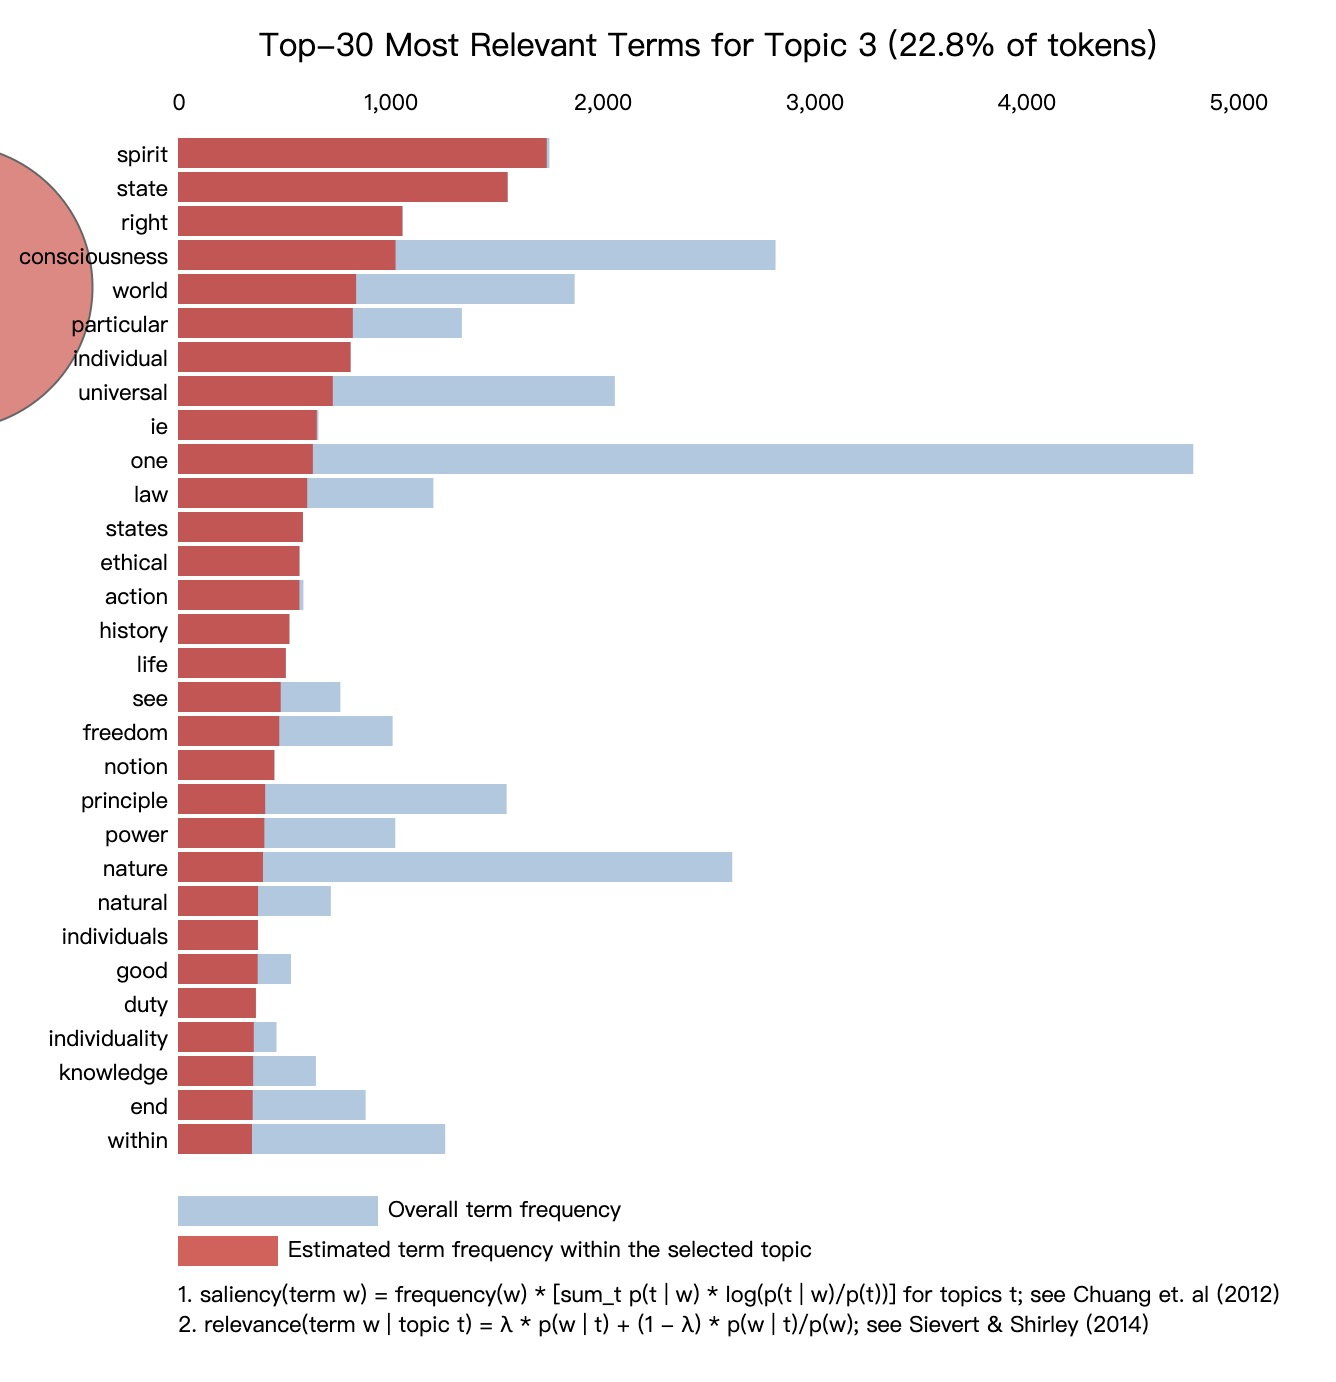

In [12]:
# construct the corpus, which just contain the article of the 3 authors
df_sub = df[(df.author == 'Kant') | (df.author == 'Fichte') | (df.author == 'Hegel') ]
# convert the 'tokenized_txt' column from str to list
data_set = list(df_sub.tokenized_txt.apply(ast.literal_eval).values)
#remove the stop words
stop_words = set(stopwords.words('english')) 
data_set = [[w for w in sentence if not w in stop_words] for sentence in data_set]
#create the dictionary
dictionary = corpora.Dictionary(data_set)  
#create the corpus, which is used in LDA model
corpus = [dictionary.doc2bow(text) for text in data_set]

[(0, '0.009*"self" + 0.009*"one" + 0.008*"consciousness" + 0.006*"spirit" + 0.006*"state" + 0.005*"universal" + 0.005*"world" + 0.005*"also" + 0.005*"existence" + 0.005*"concept"')]
0.38789245549315626
[(0, '0.014*"consciousness" + 0.012*"spirit" + 0.011*"state" + 0.008*"self" + 0.007*"right" + 0.007*"world" + 0.006*"one" + 0.006*"particular" + 0.006*"universal" + 0.006*"individual"'), (1, '0.012*"one" + 0.011*"self" + 0.010*"concept" + 0.010*"form" + 0.009*"content" + 0.008*"therefore" + 0.008*"existence" + 0.007*"unity" + 0.007*"object" + 0.007*"determination"')]
0.4706673839364929
[(0, '0.016*"spirit" + 0.014*"state" + 0.010*"right" + 0.009*"consciousness" + 0.008*"world" + 0.007*"particular" + 0.007*"individual" + 0.007*"universal" + 0.006*"ie" + 0.006*"one"'), (1, '0.013*"object" + 0.012*"reason" + 0.012*"would" + 0.012*"must" + 0.011*"one" + 0.011*"concept" + 0.009*"nature" + 0.006*"also" + 0.006*"subjective" + 0.006*"cognition"'), (2, '0.026*"self" + 0.013*"existence" + 0.012*"c

Text(0.5, 0, 'topic size')

Text(0, 0.5, 'coherence ')

Text(0.5, 1.0, 'coherence vs topic size')

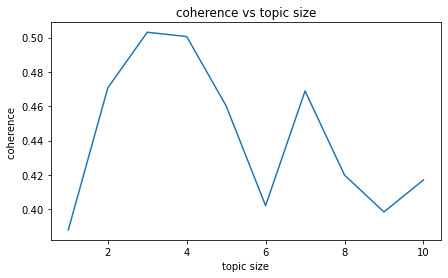

In [133]:
#coherence matrix, which is used to choose the best topic size
def coherence(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30,random_state = 1)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=10))
    ldacm = CoherenceModel(model=ldamodel, texts=data_set, dictionary=dictionary, coherence='c_v')
    print(ldacm.get_coherence())
    return ldacm.get_coherence()

# plot of coherence vs. topic size
x = range(1,11)
y = [coherence(i) for i in x]
plt.plot(x, y)
plt.xlabel('topic size')
plt.ylabel('coherence ')

plt.title('coherence vs topic size')
plt.show()

# the best topic size = 3

In [13]:
#fit the LDA Model(num_topics=3)
ldamodel = LdaModel(corpus, num_topics=3, id2word = dictionary, passes=30, random_state = 1)   #3 topics
#print the top 10 words of each topic
ldamodel.print_topics(num_topics=3, num_words=10)  

[(0,
  '0.016*"spirit" + 0.014*"state" + 0.010*"right" + 0.009*"consciousness" + 0.008*"world" + 0.007*"particular" + 0.007*"individual" + 0.007*"universal" + 0.006*"ie" + 0.006*"one"'),
 (1,
  '0.013*"object" + 0.012*"reason" + 0.012*"would" + 0.012*"must" + 0.011*"one" + 0.011*"concept" + 0.009*"nature" + 0.006*"also" + 0.006*"subjective" + 0.006*"cognition"'),
 (2,
  '0.026*"self" + 0.013*"existence" + 0.012*"content" + 0.012*"consciousness" + 0.012*"one" + 0.011*"form" + 0.010*"absolute" + 0.009*"therefore" + 0.009*"unity" + 0.009*"determination"')]

In [14]:
# visualization of LDA model
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(data, 'topic.html')

D:\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


## 7.2 LDA topic modeling for each author in german_idealism "kant" "Fintch" "Hegel"


From the plot， we can conclude that the proportion of topic of each author is different. Kant has a high proportion using topic 2， which has the top words 

0.013*"object" + 0.012*"reason" + 0.012*"would" + 0.012*"must" + 0.011*"one" + 0.011*"concept" + 0.009*"nature" + 0.006*"also" + 0.006*"subjective" + 0.006*"cognition"

However, Hegel tend to use higher proportion of topic3, which has the top words

0.026*"self" + 0.013*"existence" + 0.012*"content" + 0.012*"consciousness" + 0.012*"one" + 0.011*"form" + 0.010*"absolute" + 0.009*"therefore" + 0.009*"unity" + 0.009*"determination"

Fitche has similar proportion in topic 1 and 2.

In [18]:
#store the topics of each author
topic_probs = []
# for loop each author, cmopute the topics of each author
for author in authors:
    #get the corpus of the author
    corpus_one = list(pd.Series(corpus)[(df_sub.author == author).reset_index()['author']].values)
    n = len(corpus_one)
    # get the topic of each article of each author
    topic_predict = [ldamodel[c] for c in corpus_one]
    p1, p2, p3 = 0, 0, 0
    #get the sum of topic of all articles of each author
    for p in topic_predict:
        for item in p:
            if item[0] == 0:
                p1 += item[1]
            elif item[0] == 1:
                p2 += item[1]
            else:
                p3 += item[1]
    #get the mean of topic of all articles of each author
    p1, p2, p3 = p1/n, p2/n, p3/n
    topic_probs.append([p1, p2, p3])

<AxesSubplot:title={'center':'the topics of each author'}, xlabel='author', ylabel='proportion'>

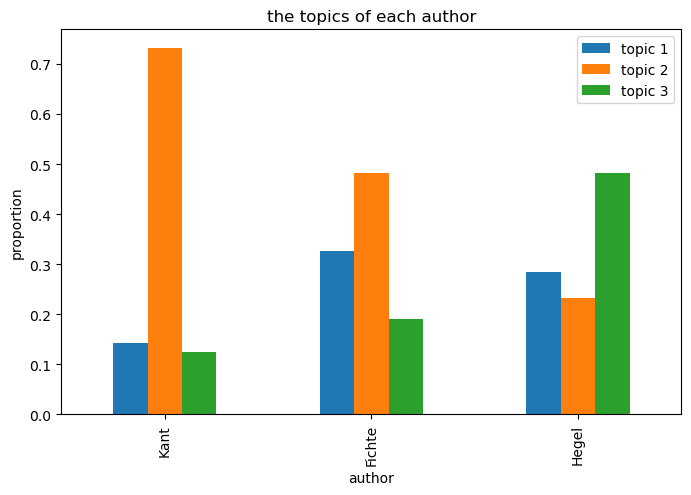

In [19]:
# display the bar plot of topic of each author
df_lda = pd.DataFrame(topic_probs)
df_lda.index = authors
df_lda.columns = ['topic 1', 'topic 2', 'topic 3'] 
df_lda.plot(kind = 'bar', figsize = (8, 5), xlabel = 'author', ylabel = 'proportion', 
            title = 'the topics of each author')

# 8.correlation-heat map 


From the correlation heat map, we could conclude that correlation of the emotion of three authors is really high， and Hgel has a negative correlation in the topic modeling with Kant and Fitche, the correlation in the topic modeling between Kant and Fitche is positive. 




Text(0.5, 1.0, 'The correlation-heat map of lda topic of the authors')

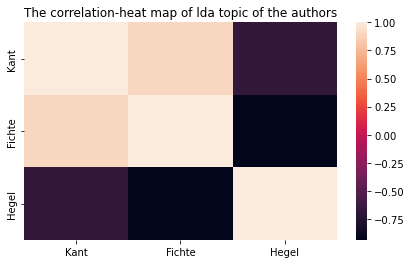

In [223]:
sns.heatmap(df_lda.T.corr()).set_title('The correlation-heat map of lda topic of the authors')

Text(0.5, 1.0, 'The correlation-heat map of emotion of the authors')

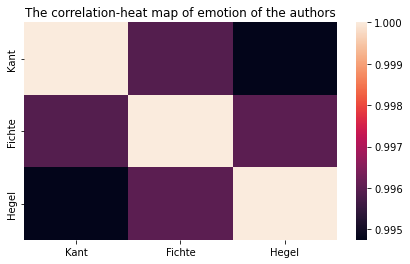

In [227]:
sns.heatmap(df_emotion.T.corr()).set_title('The correlation-heat map of emotion of the authors')

# 9. Conclusion
From the datastory, we can answer the research questions.
"Concept" , "Nature", "Object" are high frequency words in german idealism. Even though Kant and Hegel have different views on some aspect of philosophy, they both share the basic idea of german idealism, using the same words in their literary works. All of the three authors, Kant, Fitche, and Hegel are very similar in the sentiment and emotion aspect in their literary works. However, Hegel has different topic choosing as Kant and Fitche, and his LDA topics model has a strongly negative relationship with Kand and Fitche. Kant and Fitche hae similar topic choosing, which means they share the same points of view in phylosophy. 